<a href="https://colab.research.google.com/github/gaditi123/quant/blob/main/Basic_Analysis(all).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web
import datetime

import tesla stock

In [2]:
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2021, 1, 1)
tesla_stock = web.DataReader('TSLA', 'yahoo', start, end)
tesla_stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,44.066002,42.192001,42.972000,43.397999,29616500.0,43.397999
2017-01-04,45.599998,42.862000,42.950001,45.397999,56067500.0,45.397999
2017-01-05,45.495998,44.389999,45.284000,45.349998,29558500.0,45.349998
2017-01-06,46.062000,45.090000,45.386002,45.801998,27639500.0,45.801998
2017-01-09,46.383999,45.599998,45.793999,46.256001,19897500.0,46.256001


In [3]:
ford_stock = web.DataReader('F', 'yahoo', start, end)
ford_stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,12.60,12.13,12.20,12.59,40510800.0,10.255995
2017-01-04,13.27,12.74,12.77,13.17,77638100.0,10.728472
2017-01-05,13.22,12.63,13.21,12.77,75628400.0,10.402627
2017-01-06,12.84,12.64,12.80,12.76,40315900.0,10.394480
2017-01-09,12.86,12.63,12.79,12.63,39438400.0,10.288578


In [4]:
gm_stock = web.DataReader('GM', 'yahoo', start, end)
gm_stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,35.570000,34.840000,34.980000,35.150002,10904900.0,30.745390
2017-01-04,37.240002,35.470001,35.599998,37.090000,23388500.0,32.442291
2017-01-05,37.049999,36.070000,37.009998,36.389999,15636700.0,31.830006
2017-01-06,36.549999,35.930000,36.410000,35.990002,13240100.0,31.480127
2017-01-09,36.529999,35.860001,36.119999,36.009998,15204500.0,31.497618


# Visulising Data

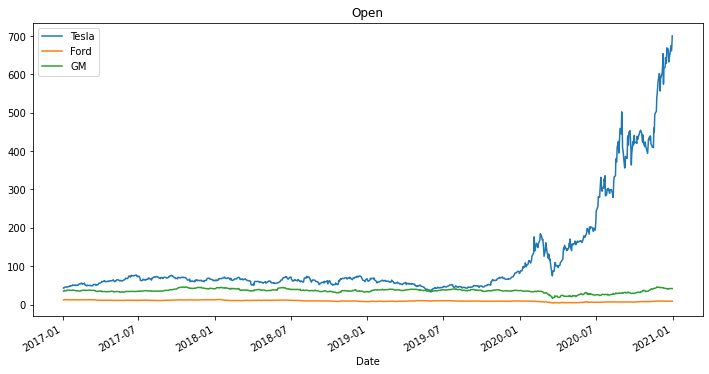

In [5]:
fig = plt.figure(figsize = (12, 6))
plt.title('Open')

tesla_stock['Open'].plot(label = 'Tesla')
ford_stock['Open'].plot(label = 'Ford')
gm_stock['Open'].plot(label = 'GM')
plt.legend()

 Plot the Volume of stock traded each day.

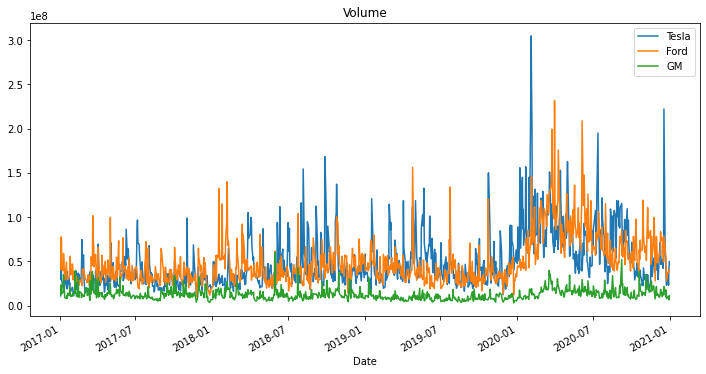

In [6]:
fig = plt.figure(figsize = (12, 6))
plt.title('Volume')

tesla_stock['Volume'].plot(label = 'Tesla')
ford_stock['Volume'].plot(label = 'Ford')
gm_stock['Volume'].plot(label = 'GM')
plt.legend()

create a new column to get a better idea of the market cap of these stocks.

In [7]:
tesla_stock['Total Traded'] = tesla_stock['Open'] * tesla_stock['Volume']
ford_stock['Total Traded'] = ford_stock['Open'] * ford_stock['Volume']
gm_stock['Total Traded'] = gm_stock['Open'] * gm_stock['Volume']

plotting total traded

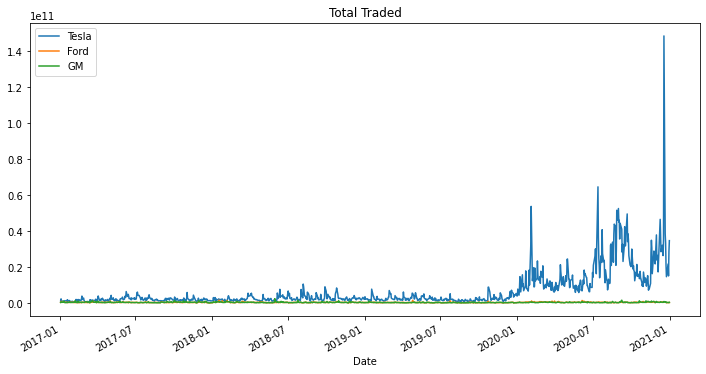

In [8]:
fig = plt.figure(figsize = (12, 6))
plt.title('Total Traded')

tesla_stock['Total Traded'].plot(label = 'Tesla')
ford_stock['Total Traded'].plot(label = 'Ford')
gm_stock['Total Traded'].plot(label = 'GM')
plt.legend()

# Moving Averages

GM

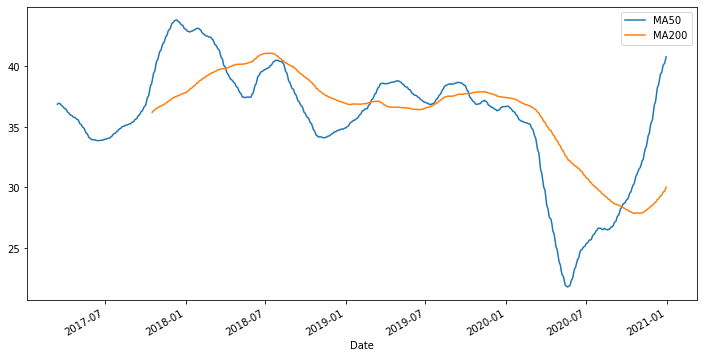

In [9]:
fig = plt.figure(figsize = (12, 6))
gm_stock.rolling(window = 50).mean()['Open'].plot(label = 'MA50')
gm_stock.rolling(window = 200).mean()['Open'].plot(label = 'MA200')
plt.legend()

candlesticks plot

In [20]:
import plotly.graph_objects as go
start = '2020-11'
end = '2020-12'
ford_candle = ford_stock.loc[start:end]
fig = go.Figure(data=[go.Candlestick(x=tesla_stock.loc[start:end].index,
                open=tesla_stock.loc[start:end]['Open'],
                high=tesla_stock.loc[start:end]['High'],
                low=tesla_stock.loc[start:end]['Low'],
                close=tesla_stock.loc[start:end]['Close'])])

fig.show()

# Basic Financial Analysis

daily percentage change - helps to find the volatality of the stock.If daily returns have a wide distribution, the stock is more volatile from one day to the next. 

In [22]:
tesla_stock['returns'] = (tesla_stock['Close'] / tesla_stock['Close'].shift(1)) - 1

In [23]:
tesla_stock.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2017-01-03,44.066002,42.192001,42.972000,43.397999,29616500.0,43.397999,1.272680e+09,NaN
2017-01-04,45.599998,42.862000,42.950001,45.397999,56067500.0,45.397999,2.408099e+09,0.046085
2017-01-05,45.495998,44.389999,45.284000,45.349998,29558500.0,45.349998,1.338527e+09,-0.001057
2017-01-06,46.062000,45.090000,45.386002,45.801998,27639500.0,45.801998,1.254446e+09,0.009967
2017-01-09,46.383999,45.599998,45.793999,46.256001,19897500.0,46.256001,9.111861e+08,0.009912


In [24]:
ford_stock['returns'] = (ford_stock['Close'] / ford_stock['Close'].shift(1)) - 1
gm_stock['returns'] = (gm_stock['Close'] / gm_stock['Close'].shift(1)) - 1

Plotting returns of each company to judge volatality

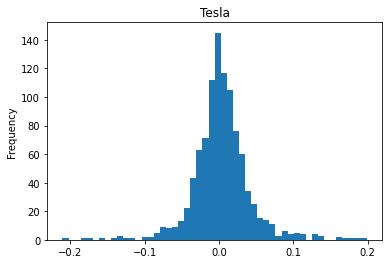

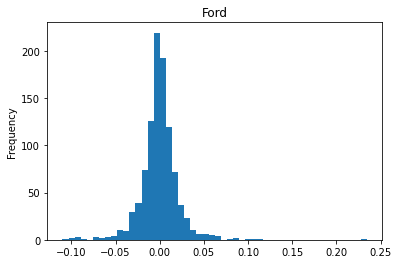

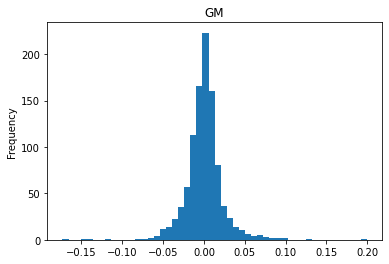

In [25]:
fig = plt.figure(0)
tesla_stock['returns'].plot(kind = 'hist', bins = 50)
plt.title('Tesla')

plt.show()

fig = plt.figure(1)
ford_stock['returns'].plot(kind = 'hist', bins = 50)
plt.title('Ford')
plt.show()

fig = plt.figure(2)
gm_stock['returns'].plot(kind = 'hist', bins = 50)
plt.title('GM')
plt.show()

Plotting on one graph

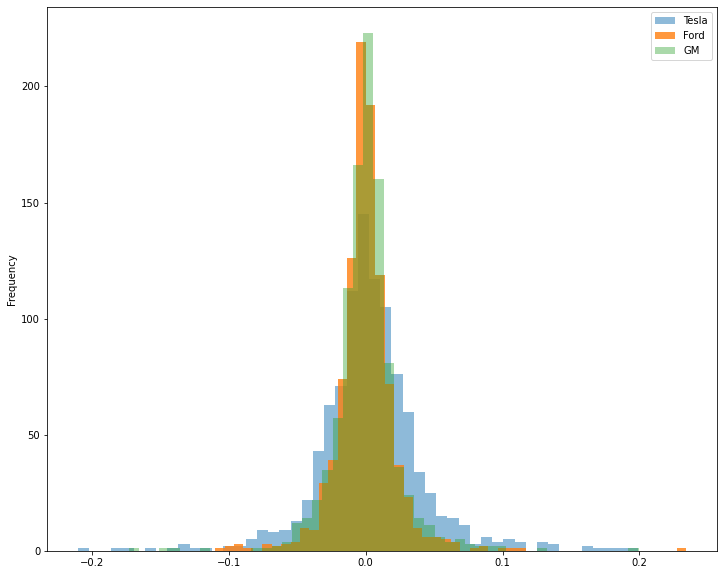

In [26]:
fig = plt.figure(figsize = (12, 10))
tesla_stock['returns'].plot(kind = 'hist', 
                            bins = 50, 
                            label = 'Tesla', 
                            alpha = 0.5)
ford_stock['returns'].plot(kind = 'hist', 
                            bins = 50, 
                            label = 'Ford',
                            alpha = 0.8)
gm_stock['returns'].plot(kind = 'hist', 
                            bins = 50, 
                            label = 'GM', 
                            alpha = 0.4)
plt.legend()

plotting KDE

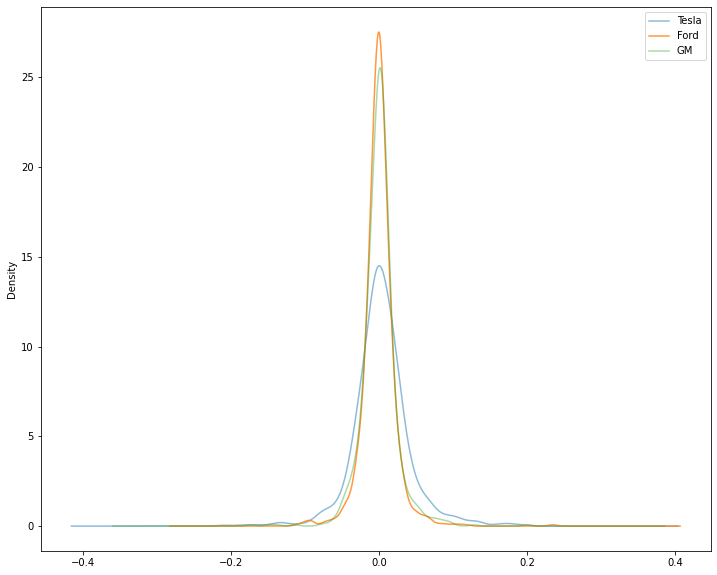

In [27]:
fig = plt.figure(figsize = (12, 10))
tesla_stock['returns'].plot(kind = 'kde', 
                            label = 'Tesla', 
                            alpha = 0.5)
ford_stock['returns'].plot(kind = 'kde', 
                           label = 'Ford',
                           alpha = 0.8)
gm_stock['returns'].plot(kind = 'kde',
                         label = 'GM', 
                         alpha = 0.4)
plt.legend()

No handles with labels found to put in legend.


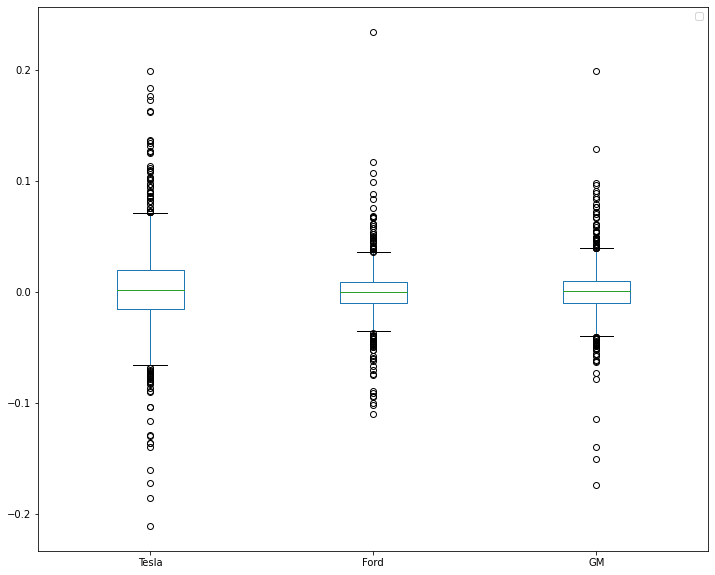

In [28]:
box_df = pd.concat([tesla_stock['returns'], ford_stock['returns'], gm_stock['returns']], axis = 1)
box_df.columns = ['Tesla', 'Ford', 'GM']
box_df.plot(kind = 'box', figsize = (12, 10))
plt.legend()

# Comparing Daily Returns between Stocks

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e43f915d0>,
      dtype=object)

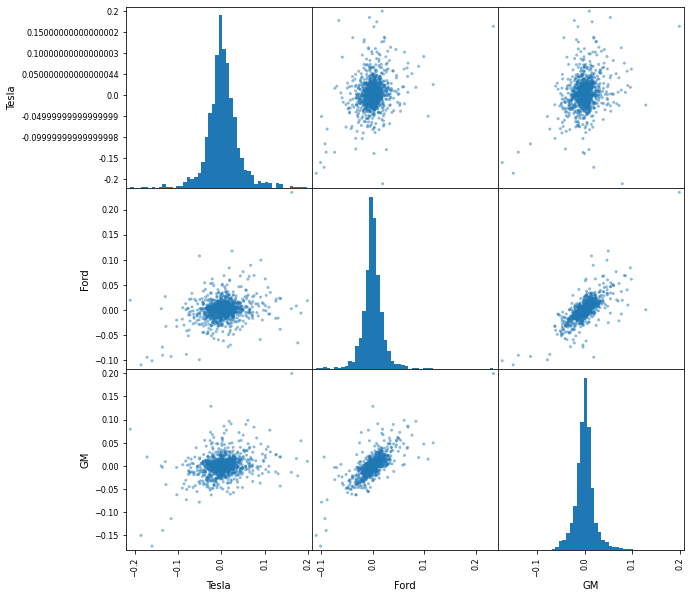

In [30]:
from pandas.plotting import scatter_matrix

scatter_matrix(box_df, figsize = (10, 10), hist_kwds={'bins':50})

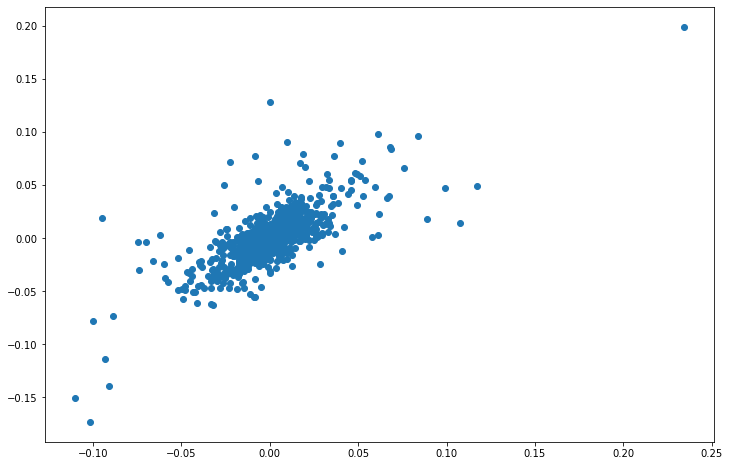

In [31]:
fig = plt.figure(figsize = (12, 8))
plt.scatter(ford_stock['returns'], gm_stock['returns'])

# Cumulative Daily Returns

In [32]:
tesla_stock['Cumulative Return'] = (1 + tesla_stock['returns']).cumprod()
tesla_stock.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cumulative Return
Date,,,,,,,,,
2017-01-03,44.066002,42.192001,42.972000,43.397999,29616500.0,43.397999,1.272680e+09,NaN,NaN
2017-01-04,45.599998,42.862000,42.950001,45.397999,56067500.0,45.397999,2.408099e+09,0.046085,1.046085
2017-01-05,45.495998,44.389999,45.284000,45.349998,29558500.0,45.349998,1.338527e+09,-0.001057,1.044979
2017-01-06,46.062000,45.090000,45.386002,45.801998,27639500.0,45.801998,1.254446e+09,0.009967,1.055394
2017-01-09,46.383999,45.599998,45.793999,46.256001,19897500.0,46.256001,9.111861e+08,0.009912,1.065856


In [33]:
ford_stock['Cumulative Return'] = (1 + ford_stock['returns']).cumprod()
gm_stock['Cumulative Return'] = (1 + gm_stock['returns']).cumprod()

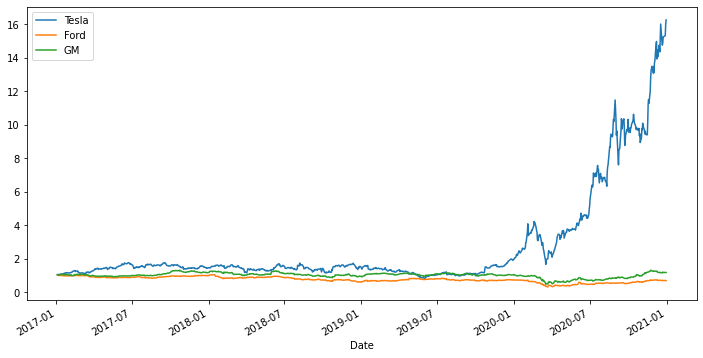

In [34]:
fig = plt.figure(figsize = (12, 6))
tesla_stock['Cumulative Return'].plot(label = 'Tesla')
ford_stock['Cumulative Return'].plot(label = 'Ford')
gm_stock['Cumulative Return'].plot(label = 'GM')
plt.legend()